# Curse Detector

### Roadmap:
1. Transform voice samples into spectrograms
2. Transform target audio (me reading article) into spectrogram
3. Build CNN, train on 'fucks' and WHAT ELSE???
4. Detect fucks in target audio
5. Output should be timestamps and confidence

## Make training spectrograms

In [2]:
import glob
import os
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
%matplotlib inline

### Fucks

In [3]:
sound_file_paths = sorted(glob.glob('train/fucks_wav/*.wav'))

In [ ]:
#librosa.display.waveplot(np.array(raw_sounds[0]),sr=22050)

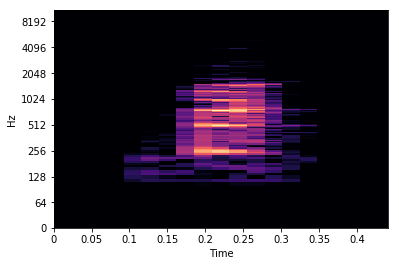

In [17]:
specs_fucks = []
for file in sound_file_paths:
    raw_sounds = librosa.load(file)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(raw_sounds[0]))**2, ref=np.max)
    specs_fucks.append(D) # this array should already be enough
    log_spec = librosa.display.specshow(D,x_axis='time' ,y_axis='log') #shape is 1025, 57

    fig = log_spec.get_figure()
    fig.savefig('train/fucks_specs/' + os.path.split(file)[1] + '_log_spec.png')


# Now we can save it to a numpy array.
#data = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
#data = data.reshape(fig.canvas.get_width_height()[::-1] + (3,))

### Others

In [3]:
sound_file_paths = sorted(glob.glob('train/other_wav/*.wav'))

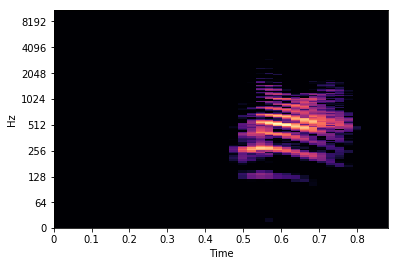

In [4]:
specs_others = []
for file in sound_file_paths:
    raw_sounds = librosa.load(file)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(raw_sounds[0]))**2, ref=np.max)
    specs_others.append(D) # this array should already be enough
    log_spec = librosa.display.specshow(D,x_axis='time' ,y_axis='log') #shape is 1025, 57

    fig = log_spec.get_figure()
    fig.savefig('train/other_specs/' + os.path.split(file)[1] + '_log_spec.png')

## Make test spectrograms

In [3]:
sound_file_paths = sorted(glob.glob('test/test_wav/*.wav'))

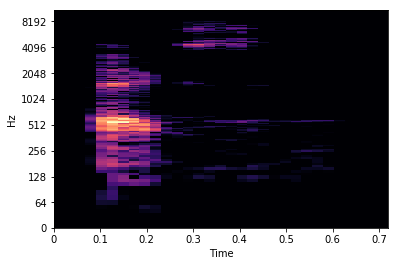

In [20]:
#specs_test = []
for file in sound_file_paths[601:692]:
    raw_sounds = librosa.load(file)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(raw_sounds[0]))**2, ref=np.max)
    specs_test.append(D) # this array should already be enough
    log_spec = librosa.display.specshow(D,x_axis='time' ,y_axis='log') #shape is 1025, 57

    fig = log_spec.get_figure()
    fig.savefig('test/test_spec/' + os.path.split(file)[1] + '_log_spec.png')

In [9]:
sound_file_paths[605:615]

['test/test_wav/60000.wav',
 'test/test_wav/60500.wav',
 'test/test_wav/61000.wav',
 'test/test_wav/61500.wav',
 'test/test_wav/62000.wav',
 'test/test_wav/62500.wav',
 'test/test_wav/63000.wav',
 'test/test_wav/63500.wav',
 'test/test_wav/64000.wav',
 'test/test_wav/64500.wav']